In [4]:

# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [5]:
# Use to grab data from the web(HTTP capabilities)
import requests

# StringIO to work with the csv file, the DataFrame will require a .read() method
from StringIO import StringIO

In [6]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

#requests to get the information in text form
source = requests.get(url).text

#StringIO to avoid an IO error with pandas
poll_data = StringIO(source)
poll_df = pd.read_csv(poll_data)
poll_df.info()
poll_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


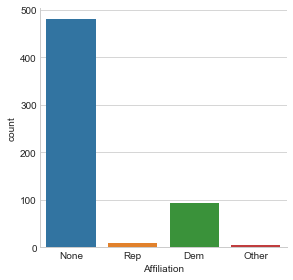

In [7]:
sns.factorplot('Affiliation',data=poll_df,kind="count")

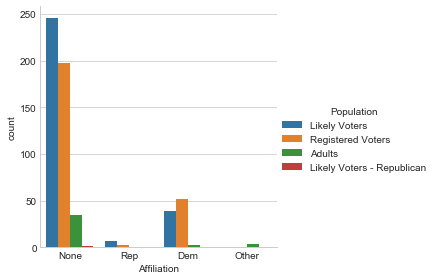

In [8]:
sns.factorplot('Affiliation',data=poll_df,hue="Population",kind="count")



In [9]:
avg = pd.DataFrame(poll_df.mean())
#axis = 0, is for row, 1 for column
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Text',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)
avg.drop('Other',axis=0,inplace=True)
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [10]:
#To get standard deviations
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)
std.drop('Question Text',axis=0,inplace=True)
std.drop('Other',axis=0,inplace=True)

In [11]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


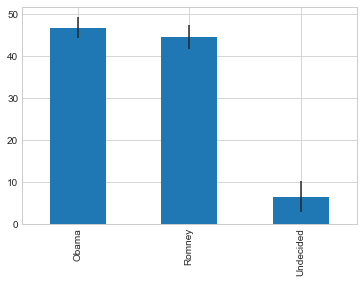

In [12]:
#Y is the std. dev, bar plot
avg.plot(yerr=std,kind='bar',legend=False)

In [13]:
#How close are the polls->check the undecided factor
#Concat of avg and std along the column 
poll_avg = pd.concat([avg,std],axis=1)


In [14]:
poll_avg.columns = ['average','std']
poll_avg

,average,std
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


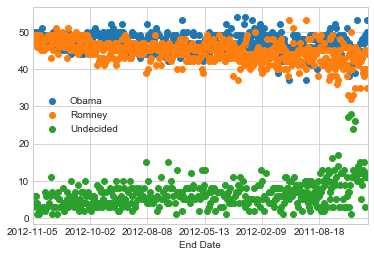

In [15]:
#Plot of the sentiment according to the dates
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')


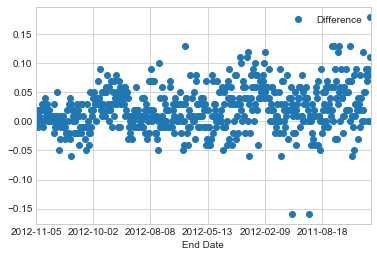

In [16]:
#Number of voters who are undecided becomes lesser and Obama and Romeney have lesser gap by the day 
poll_df["Difference"] = (poll_df.Obama - poll_df.Romney)/100
poll_df.plot(x='End Date',y='Difference',linestyle='',marker='o')

In [17]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean() #It will keep the current index
poll_df.head() #If the same dates exits, take mean 

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


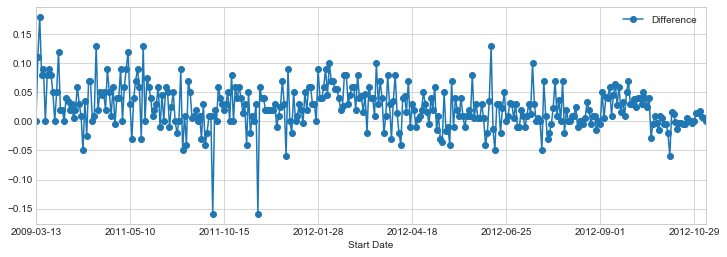

In [18]:
poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-')

In [19]:
print poll_df.loc[poll_df["Difference"].idxmin()]
#To query the date when Romney had a winning margin, his highest

Start Date                2011-10-05
Number of Observations           602
Obama                             37
Romney                            53
Undecided                         10
Other                            NaN
Question Text                    NaN
Question Iteration                 1
Difference                     -0.16
Name: 94, dtype: object


In [20]:
#to mark the debate dates in the graph 
row_in = 0 
xlimit = []
#To get the index of debate dates
for date in poll_df["Start Date"]:
    if date[0:7]== '2012-10':
        xlimit.append(row_in)
        
        

    row_in += 1
print min(xlimit)
print max(xlimit)

325
352


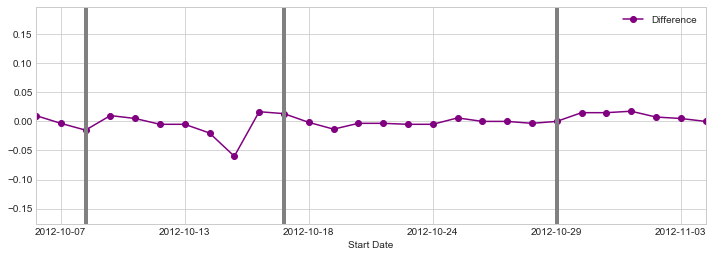

In [21]:
# Start with original figure
fig = poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))

# Oct 3
plt.axvline(x=329+2, linewidth=4, color='grey')
#Oct 11
plt.axvline(x=329+10, linewidth=4, color='grey')
#Oct 22
plt.axvline(x=329+21, linewidth=4, color='grey')

In [22]:
#DONOR DATA
donor_df = pd.read_csv('donor.csv')
donor_df.head()

C:\Users\lenovo\Anaconda2i\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [23]:
donor_df['contb_receipt_amt'].max()

2014490.51

In [24]:
donor_df['contb_receipt_amt'].value_counts()
donor_mean = donor_df['contb_receipt_amt'].mean()
donor_std = donor_df["contb_receipt_amt"].std()
print donor_mean
print donor_std
#To get the frequency of donations

298.235150095
3749.66672327


In [25]:
#Given the average, the std is too large
top_donor = donor_df['contb_receipt_amt'].copy()

top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [26]:
#Get rid of negs which are refund amounts 
top_donor = top_donor[top_donor>0]

In [27]:
top_donor.head()


0    250.0
1     50.0
2    250.0
3    250.0
4    300.0
Name: contb_receipt_amt, dtype: float64

In [28]:
top_donor.value_counts()

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
20.00       17565
15.00       16163
150.00      14600
75.00       13647
201.20      11718
30.00       11381
300.00      11204
20.12        9897
5.00         9024
40.00        5007
2000.00      4128
55.00        3760
1500.00      3705
3.00         3383
60.00        3084
400.00       3066
110.00       2554
125.00       2520
19.00        2474
112.00       2457
            ...  
41.04           1
77.13           1
114.43          1
31.24           1
97.65           1
13.66           1
157.12          1
73.12           1
499.66          1
188.65          1
1197.50         1
122.32          1
144.88          1
77.88           1
19.53           1
188.60          1
47.10           1
19.85           1
28.83           1
202.59          1
9.25            1
202.66          1
1205.00         1
80.73           1
115.07    

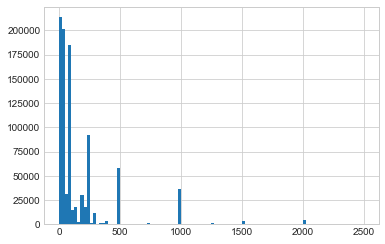

In [29]:
#To check the most common amounts
com_don = top_donor[top_donor<2500]
com_don.hist(bins=100)
#This shows peaks at round histogram values

In [30]:
candidate = donor_df.cand_nm.unique()
#To get the names of the candidates 
candidate

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [31]:
#To add a party affiliation column so we are mapping the names to the parties
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [32]:
donor_df["Party"] = donor_df.cand_nm.map(party_map)

In [33]:
'''for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama, Barack':
        donor_df['Party_aff'][i] = 'Democrat'
    else:
        donor_df['Party_aff'][i] = 'Republican'
        '''

"for i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama, Barack':\n        donor_df['Party_aff'][i] = 'Democrat'\n    else:\n        donor_df['Party_aff'][i] = 'Republican'\n        "

In [34]:
donor_df = donor_df[donor_df.contb_receipt_amt>0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [35]:
#To get aggregate donors by party candidate
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()


cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [36]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
#To get the amount of money collected for each candidate

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [37]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount: 
    print 'The candidate donation for %s money is $ %.0f '%(cand_amount.index[i],don)
    i+=1

The candidate donation for Bachmann, Michelle money is $ 2711439 
The candidate donation for Cain, Herman money is $ 7101082 
The candidate donation for Gingrich, Newt money is $ 12832770 
The candidate donation for Huntsman, Jon money is $ 3330373 
The candidate donation for Johnson, Gary Earl money is $ 566962 
The candidate donation for McCotter, Thaddeus G money is $ 39030 
The candidate donation for Obama, Barack money is $ 135877427 
The candidate donation for Paul, Ron money is $ 21009620 
The candidate donation for Pawlenty, Timothy money is $ 6004819 
The candidate donation for Perry, Rick money is $ 20305754 
The candidate donation for Roemer, Charles E. 'Buddy' III money is $ 373010 
The candidate donation for Romney, Mitt money is $ 88335908 
The candidate donation for Santorum, Rick money is $ 11043159 


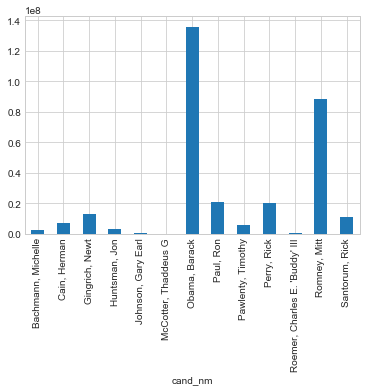

In [38]:
cand_amount.plot(kind="bar")

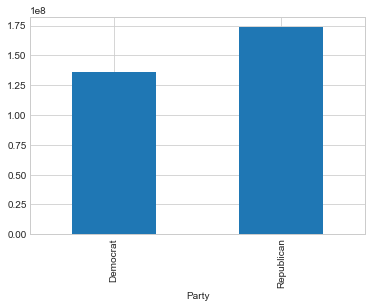

In [39]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [40]:
#Obama benefitted from not having his donations split
#Correlate the occupation with the donation for the party
occupation_df = donor_df.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [41]:
occupation_df.shape

(45067, 2)

In [42]:
occupation_df = occupation_df[occupation_df.sum(1) >1000000]
occupation_df.shape

(31, 2)

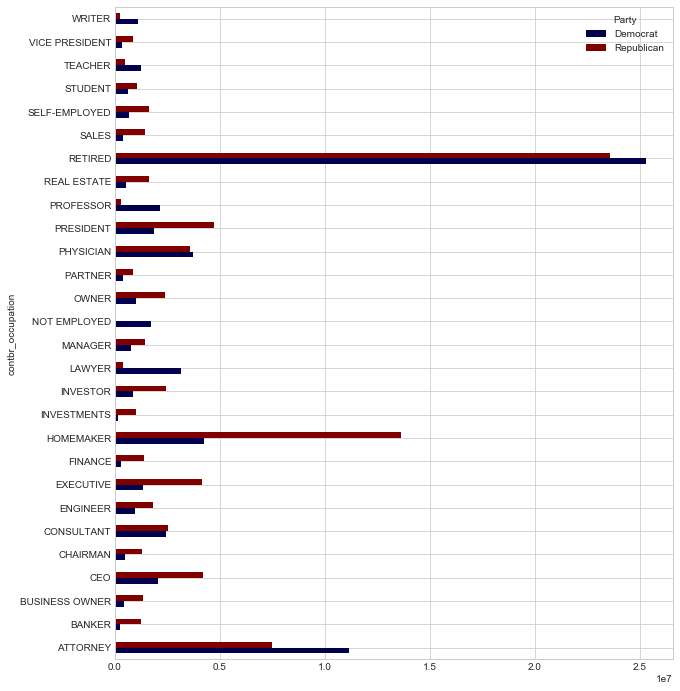

In [52]:

#To merge CEO AND C.E.O
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
#To drop psuedo null values and that should be permanent
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED','C.E.O.'],inplace = True)
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')